# Simulate the Spin Dynamics on a Heisenberg Chain

<em> Copyright (c) 2021 Institute for Quantum Computing, Baidu Inc. All Rights Reserved. </em>

## Introduction

The simulation of quantum systems is one of the many important applications of quantum computers. In general, the system's properties are characterized by its Hamiltonian operator $H$. For physical systems at different scales, their Hamiltonian takes different forms. For example in quantum chemistry, where we are often interested in the properties of molecules, which are determined mostly by electron-electron Coulomb interactions. As a consequence, a molecular Hamiltonian is usually written in the form of fermionic operators which act on the electron's wave function. On the other hand, the basic computational unit of a quantum computer - qubit, and its corresponding operations, correspond to spin and spin operators in physics.  So in order to simulate a molecular Hamiltonian on a quantum computer, one needs to first map fermionic operators into spin operators with mappings such as Jordan-Wigner or Bravyi-Kitaev transformation, etc. Those transformations often create additional overhead for quantum simulation algorithms, make them more demanding in terms of a quantum computer's number of qubits, connectivity, and error control. It was commonly believed that one of the most near-term applications for quantum computers it the simulation of quantum spin models, whose Hamiltonian are natively composed of Pauli operators. 

This tutorial will demonstrate how to simulate the time evolution process of a one-dimensional Heisenberg chain, one of the most commonly studied quantum spin models. This tutorial is based on the `construct_trotter_circuit()`, which can construct the Trotter-Suzuki or any custom trotterization circuit to simulate the time-evolving operator. We have already covered some of the basic usage as well as the theoretical background in another tutorial [Hamiltonian Simulation with Product Formula](./HamiltonianSimulation_EN.ipynb). A brief introduction of the Suzuki product formula is provided below for readers who are not familiar with it. In the remainder of this tutorial, we will be focusing on two parts:
- Simulating the spin dynamics on a Heisenberg chain
- Using randomized permutation to build a custom trotter circuit

---
Before discussing the physical background of the Heisenberg model, let's go over the basic concepts of time evolution simulation with a quantum circuit. Readers already familiar with this or uninterested in such details could choose to skip to the section of **Heisenberg model and its dynamical simulation** to continue reading.

### Simulate the time evolution with Suzuki product formula

The core idea of the Suzuki product formula can be described as follows: First, for a time-independent Hamiltonian $H = \sum_k^L h_k$, the system's time evolution operator is 

$$
U(t) = e^{-iHt}.
\tag{1}
$$

Further dividing it into $r$ pieces, we have

$$
e^{-iHt} = \left( e^{-iH \tau} \right)^r, ~\tau=\frac{t}{r}.
\tag{2}
$$

This strategy is sometimes referred to as "Totterization". 

And for each $e^{-iH \tau}$ operator, its Suzuki decompositions are

$$
\begin{aligned}
S_1(\tau) &= \prod_{k=0}^L \exp ( -i h_k \tau),
\\
S_2(\tau) &= \prod_{k=0}^L \exp ( -i h_k \frac{\tau}{2})\prod_{k=L}^0 \exp ( -i h_k \frac{\tau}{2}),
\\
S_{2k+2}(\tau) &= [S_{2k}(p_k\tau)]^2S_{2k}\left( (1-4p_k)\tau\right)[S_{2k}(p_k\tau)]^2.
\end{aligned}
\tag{3}
$$

Back to the original time evolution operator $U(t)$, with the $k$-th order Suzuki decomposition, it can be reformulated as

$$
U(t) = e^{-iHt} = \left( S_{k}\left(\frac{t}{r}\right) \right)^r.
\tag{4}
$$

The above scheme is referred to as the Suzuki product formula or Trotter-Suzuki decomposition. It is proven that it could efficiently simulate any time evolution process of a system with a k-local Hamiltonian up to arbitrary precision [1]. In another tutorial [Hamiltonian Simulation with Product Formula](./HamiltonianSimulation_EN.ipynb), we have shown how to calculate its error upper bound.

---

## Heisenberg Model and Its Dynamic Simulation

The Heisenberg model is arguably one of the most commonly used model in the research of quantum magnetism and quantum many-body physics. Its Hamiltonian can be expressed as 

$$
H = \sum_{\langle i, j\rangle} 
\left( J_x S^x_{i} S^x_{j} + J_y S^y_{i} S^y_{j} + J_z S^z_{i} S^z_{j} \right)
+
\sum_{i} h_z S^z_i, 
\tag{5}
$$

with $\langle i, j\rangle$ depends on the specific lattice structure, $J_x, J_y, J_z$ describe the spin coupling strength respectively in the $xyz$ directions and $h_z$ is the magnetic field applied along the $z$ direction. When taking $J_z = 0$, the Hamiltonian in (5) can be used to describe the XY model; or when taking $J_x = J_y = 0$, then (5) is reduced to the Hamiltonian of Ising model. Note that here we used a notation of many-body spin operators $S^x_i, S^y_i, S^z_i$ which act on each of the local spins, this is slightly different from our usual notations but are very common in the field of quantum many-body physics. For a spin-1/2 system, when neglecting a coefficient of $\hbar/2$, the many-body spin operators are simple tensor products of Pauli operators, i.e.

$$
S^P_{i} = \left ( \otimes_{j=0}^{i-1} I \right ) \otimes \sigma_{P} \otimes \left ( \otimes_{j=i+1}^{L} I \right ),
P \in \{ x, y, z \},
\tag{6}
$$

where the $\sigma_{P}$ are Pauli operators, which can also be represented as $XYZ$. It is worth noting that while the Heisenberg model is an important theoretical model, but it also describes the physics in realistic materials (crystals). Starting from the Hubbard model, which describes the interactions and movement of electrons on a lattice, under certain conditions, the electrons are fixed to each site and form a half-filling case. In this case, the only left-over interaction is an effective spin-spin exchange interaction and the Hubbard model is reduced to the Heisenberg model [2]. While it seems that many approximations are made, the Heisenberg model has successfully described the properties of many crystal materials at low temperatures [3]. For example, many readers might be familiar with the copper nitrate crystal ($\rm Cu(NO_3)_2 \cdot 2.5 H_2 O$), and its behavior at $\sim 3k$ can be described by an alternating spin-1/2 Heisenberg chain [4].

Depending on the lattice structure, the Heisenberg model can host highly non-trivial quantum phenomena. As a one-dimensional chain, it demonstrates ferromagnetism and anti-ferromagnetism, symmetry breaking and gapless excitations [3]. On frustrated two-dimension lattices, some Heisenberg models constitute candidate models for quantum spin liquids, a long-range entangled quantum matter [5]. When under a disordered external magnet field, the Heisenberg model also can be used in the research of a heated topic, many-body localization, where the system violates the thermalization hypothesis and retains memories of its initial state after infinitely long time's evolution [6]. 

Simulating the time evolution of a Heisenberg model, i.e. the dynamical simulation, could help us to investigate the non-equilibrium properties of the system, and it might help us to locate novel quantum phases such as the many-body localized (MBL) phase introduced above or even more interestingly, time crystal phases [7]. Other than developing theories, the dynamic simulation plays a vital role for experimentalists, as the spin correlation function (also referred to as dynamical structure factors) is directly linked to the cross sections for scattering experiments or line shapes in nuclear magnetic resonance (NMR) experiments [3]. And this function, which we omit its exact form here, is a function of integration over $\langle S(t) S(0) \rangle$. So that in order to bridge the experiment and theory, one also need to compute the system's evolution in time.

### Use Paddle Quantum to simulate and observe the time evolution process of a Heisenberg chain

Now, we will take a one dimensional Heisenberg chain under disordered field of length 5 as an example, and demonstrate how the construct its time evolving circuit in Paddle Quantum. First we need to import relevant packages.

In [1]:
import numpy as np
import scipy
from scipy import linalg
import matplotlib.pyplot as plt
from paddle_quantum.circuit import UAnsatz
from paddle_quantum.utils import SpinOps, Hamiltonian, gate_fidelity
from paddle_quantum.trotter import construct_trotter_circuit, get_1d_heisenberg_hamiltonian

Then we use `get_1d_heisenberg_hamiltonian()` function to generate the Hamiltonian of a Heisenberg chain.

In [2]:
h = get_1d_heisenberg_hamiltonian(length=5, j_x=1, j_y=1, j_z=2, h_z=2 * np.random.rand(5) - 1,
                                  periodic_boundary_condition=False)
print('The Hamiltoninan is:')
print(h)

The Hamiltoninan is:
1.0 X0, X1
1.0 Y0, Y1
2.0 Z0, Z1
1.0 X1, X2
1.0 Y1, Y2
2.0 Z1, Z2
1.0 X2, X3
1.0 Y2, Y3
2.0 Z2, Z3
1.0 X3, X4
1.0 Y3, Y4
2.0 Z3, Z4
0.30554627625735065 Z0
0.6025258365109716 Z1
-0.1545550348192246 Z2
0.9823722719316286 Z3
-0.6157481417955128 Z4


After obtaining its Hamiltonian, we can then pass it to the `construct_trotter_circuit()` function to construct its time evolution circuit. Also, with `Hamiltonian.construct_h_matrix()` who returns the matrix form of a `Hamiltonian` object, we can calculate its exponential, i.e. the exact time-evolving operator. By taking the quantum circuit's unitary matrix `UAnsatz.U` and comparing it to the exact time-evolving operator by calculating their fidelity, we can evaluate how well the constructed circuit could describe the correct time evolution process.

In [3]:
# calculate the exact evolution operator of time t
def get_evolve_op(t): return scipy.linalg.expm(-1j * t * h.construct_h_matrix())

# set the total evolution time and the number of trotter steps
t = 3
r = 10
# construct the evolution circuit
cir_evolve = UAnsatz(5)
construct_trotter_circuit(cir_evolve, h, tau=t/r, steps=r, order=2)
# get the circuit's unitary matrix and calculate its fidelity to the exact evolution operator
U_cir = cir_evolve.U.numpy()
print('The fidelity between the circuit\'s unitary and the exact evolution operator is : %.2f' % gate_fidelity(get_evolve_op(t), U_cir))

The fidelity between the circuit's unitary and the exact evolution operator is : 0.58


#### Permute the Hamiltonian according to commutation relationships

It has been shown that the product formula's simulating error can be reduced by rearranging different terms. Since the error of simulation arises from the non-commuting terms in the Hamiltonian, one natural idea is to permute the Hamiltonian so that commuting terms are put together. For example, we could divide a Hamiltonian into four parts,

$$
H = H_x + H_y + H_z + H_{\rm other},
\tag{7}
$$

where $H_x, H_y, H_z$ contain terms only composed of $X, Y, Z$ operators, and $H_{\rm other}$ are all the other terms. For Hamiltonian describe in (5), all terms can be grouped into $H_x, H_y, H_z$.

Another approach is to decompose the Hamiltonian according to the system geometry. Especially for one-dimensional nearest-neighbor systems, the Hamiltonian can be divided into even and odd terms, 

$$
H = H_{\rm even} + H_{\rm odd}.
\tag{8}
$$

where $H_{\rm even}$ are interactions on sites $(0, 1), (2, 3), ...$ and $H_{\rm odd}$ are interactions on sites $(1, 2), (3, 4), ...$.

Note that these two permutation strategies do **not** reduce the bound on simulation error, and empirical results return a more case-by-case effect on the error. Nevertheless, we provide the above two decompositions as a built-in option of the `construct_trotter_circuit()` function. By setting the argument `grouping='xyz'` or `grouping='even_odd'`, the function will automatically try to rearrange the Hamiltonian when adding the trotter circuit. Besides, users can also customize permutation by using the argument `permutation`, which we will introduce shortly in the next section. For now, let's test the `grouping` option and check the variations in fidelity:

In [4]:
# using the same evolution parameters, but set 'grouping="xyz"' and 'grouping="even_odd"'
cir_evolve_xyz = UAnsatz(5)
cir_evolve_even_odd = UAnsatz(5)
construct_trotter_circuit(cir_evolve_xyz, h, tau=t/r, steps=r, order=2, grouping='xyz')
construct_trotter_circuit(cir_evolve_even_odd, h, tau=t/r, steps=r, order=2, grouping='even_odd')
U_cir_xyz = cir_evolve_xyz.U.numpy()
U_cir_even_odd = cir_evolve_even_odd.U.numpy()
print('Original fidelity：', gate_fidelity(get_evolve_op(t), U_cir))
print('XYZ permuted fidelity：', gate_fidelity(get_evolve_op(t), U_cir_xyz))
print('Even-odd permuted fidelity：', gate_fidelity(get_evolve_op(t), U_cir_even_odd))

Original fidelity： 0.5777594967189371
XYZ permuted fidelity： 0.7009189629323416
Even-odd permuted fidelity： 0.7301965802081132


#### Initial state preparation and final state observation

Now let's prepare the system's initial state. Generally speaking, one common approach when studying the dynamics of a quantum system is to start the evolution from different direct product states. In Paddle Quantum, the default initial state is $\vert 0...0 \rangle$, so we can simply apply $X$ gate to different qubits to get a direct product initial state. For example, here we apply $X$ gate to qubits representing spins on odd sites, so the initial state will become $\vert 01010 \rangle$, as in spin notation, $\vert \downarrow \uparrow \downarrow \uparrow \downarrow \rangle$.

In [5]:
# create a circuit used for initial state preparation
cir = UAnsatz(5)
cir.x(1)
cir.x(3)
# run the circuit the get the initial state
init_state = cir.run_state_vector()

By passing the initial state `init_state` into the method `UAnsatz.run_state_vector(init_state)`, we can evolve the initial state with a quantum circuit. Then by `UAnsatz.expecval()` method, the expectation value of a user-specified observable on the final state could be measured. For simplicity, we only consider a single-spin observable $\langle S_i^z \rangle$ here, its corresponding Pauli string is `[[1, 'Zi']]` (i being an integer).

In [6]:
cir_evolve_even_odd.run_state_vector(init_state)
print('Sz observable on the site 0 is：', cir_evolve_even_odd.expecval([[1, 'Z0']]).numpy()[0])

Sz observable on the site 0 is： 0.6516225940072864


Similarly, by adjusting the simulation time length and changing the observable, we could plot the entire evolution process of different spins. Note here in order to compute the exact solution, we need to construct the matrix form of each observable $S_i^z$ using `SpinOps` class and calculate their expectation value with $\langle \psi(t) \vert S_i^z \vert \psi(t) \rangle$.

In [7]:
def get_evolution_z_obs(h, t_total, order=None, n_steps=None, exact=None):
    """ 
    a function to calculate a system's Sz observable on each site for an entire evolution process t
    specify the order the trotter length by setting order and n_steps
    set exact=True to get the exact results
    """
    z_obs_total = []
    for t in np.linspace(0., t_total, t_total * 3 + 1):
        z_obs = []
        # get the final state by either evolving with a circuit or the exact operator
        if exact:
            spin_operators = SpinOps(h.n_qubits)
            fin_state = get_evolve_op(t).dot(init_state)
        else:
            cir_evolve = UAnsatz(5)
            construct_trotter_circuit(cir_evolve, h, tau=t/n_steps, steps=n_steps, order=order, grouping='even_odd')
            fin_state = cir_evolve.run_state_vector(init_state)
        # measure the observable on each site
        for site in range(h.n_qubits):
            if exact:
                z_obs.append(fin_state.conj().T.dot(spin_operators.sigz_p[site]).dot(fin_state))
            else:
                z_obs.append(cir_evolve.expecval([[1, 'Z' + str(site)]]).numpy()[0])
        z_obs_total.append(z_obs)
    return np.array(z_obs_total).real  

def plot_comparison(**z_obs_to_plot):
    """
    plot comparison between different evolution results
    assume each argument passed into it is returned from get_evolution_z_obs() function for the same t_total
    """
    fig, axes = plt.subplots(1, len(z_obs_to_plot), figsize = [len(z_obs_to_plot) * 3, 5.5])
    
    ax_idx = 0
    for label in z_obs_to_plot.keys():
        im = axes[ax_idx].imshow(z_obs_to_plot[label], cmap='coolwarm_r', interpolation='kaiser', origin='lower')
        axes[ax_idx].set_title(label, fontsize=15)
        ax_idx += 1

    for ax in axes:
        ax.set_xlabel('site', fontsize=15)
        ax.set_yticks(np.arange(0, z_obs_total_exact.shape[0], 3))
        ax.set_yticklabels(np.arange(0, z_obs_total_exact.shape[0]/3, 1))
        ax.set_xticks(np.arange(z_obs_total_exact.shape[1]))
        ax.set_xticklabels(np.arange(z_obs_total_exact.shape[1]))

    axes[0].set_ylabel('t', fontsize=15)
    cax = fig.add_axes([0.92, 0.125, 0.02, 0.755])
    
    
    fig.colorbar(im, cax)
    cax.set_ylabel(r'$\langle S^z_i (t) \rangle$', fontsize=15)

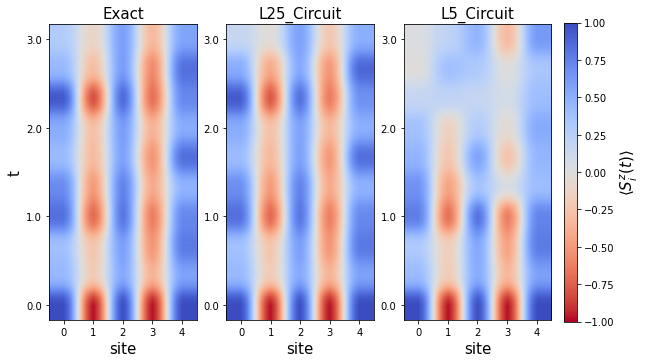

In [8]:
# calculate the evolution process with circuits of trotter number 25 and 5, and the exact result
z_obs_total_exact = get_evolution_z_obs(h, t_total=3, exact=True)
z_obs_total_cir = get_evolution_z_obs(h, order=1, n_steps=25, t_total=3)
z_obs_total_cir_short = get_evolution_z_obs(h, order=1, n_steps=5, t_total=3)

plot_comparison(
    Exact=z_obs_total_exact,
    L25_Circuit=z_obs_total_cir,
    L5_Circuit=z_obs_total_cir_short)

Observed that with 25 trotter blocks, the circuit could very well simulate the spin dynamics for the entire period. In contrast, the shorter circuit with only 5 trotter blocks could only describe the system's behavior correctly up to a certain time until the simulation breaks down.

**Exercise：** Could the readers try to observe the evolution of spatial spin correlation function $\langle S_i^z S_j^{z} \rangle$？

## Design customized trotter circuit with random permutation

### Random permutation

Although it seems more physically reasonable to group the commuting terms in the Hamiltonian to achieve better simulation performance, many evidence has shown that using a fixed order Hamiltonian for each trotter block might cause the errors to accumulate. On the other hand, evolving the Hamiltonian according to an random ordering might "wash-out" some of the coherent error in the simulation process and replace it with less harmful stochastic noise [8]. Both theoretical analyses on the error upper bound and empirical evidences show that this randomization could effectively reduce the simulation error [9].

### Customize trotter circuit construction

By default, the function `construct_trotter_circuit()` constructs a time evolving circuit according to the Suzuki product formula. However, users could choose to customize both the coefficients and permutations by setting `method='custom'` and passing custom arrays to arguments `permutation` and `coefficient`. 

**Note:** The user should be very cautious when using arguments `coefficient`, `tau` and `steps` altogether. By setting `steps` other than 1 and `tau` other than $t$ (the total evolution time), it is possible to further trotterize the custom coefficient and permutation. For example, when setting `permutation=np.arange(h.n_qubits)` and `coefficient=np.ones(h.n_qubits)`, the effect of `tau` and `steps` is exactly the same as constructing the first-order product formula circuit.

Let us further demonstrate the customization function with a concrete example. With the same spin chain Hamiltonian, now we wish to design an evolution strategy similar to the first-order product formula, however the ordering of the Hamiltonian terms within each trotter block is independently random. We could implement this by pass an arraying of shape `(n_steps, h.n_terms)` to the argument `permutation`, and each row of that array is a random permutation $P(N)$.

In [9]:
# An example for customize permutation
permutation = np.vstack([np.random.permutation(h.n_terms) for i in range(100)])

Then, we compare the fidelity of such strategy with the first order product formula under different trotter length.

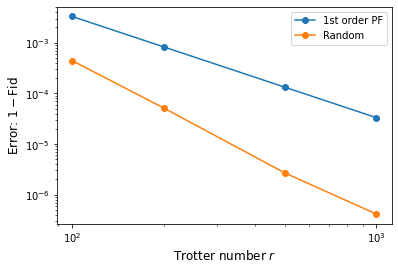

In [10]:
def compare(n_steps):
    """
    compare the first order product formula and random permutation's fidelity for a fixed evolution time t=2
    input n_steps is the number of trotter steps
    output is respectively the first order PF and random permutations' fidelity 
    """
    t = 2
    cir_evolve = UAnsatz(5)
    construct_trotter_circuit(cir_evolve, h, tau=t/n_steps, steps=n_steps, order=1)
    U_cir = cir_evolve.U.numpy()
    fid_suzuki = gate_fidelity(get_evolve_op(t), U_cir)
    cir_permute = UAnsatz(5)
    permutation = np.vstack([np.random.permutation(h.n_terms) for i in range(n_steps)])
    # when coefficient is not specified, a normalized uniform coefficient will be automatically set
    construct_trotter_circuit(cir_permute, h, tau=t, steps=1, method='custom', permutation=permutation)
    U_cir = cir_permute.U.numpy()
    fid_random = gate_fidelity(get_evolve_op(t), U_cir)
    return fid_suzuki, fid_random

# compare the two fidelity for different trotter steps
# as a demo, we only run the experiment once. Interested readers could run multiple times to calculate the error bar
n_range = [100, 200, 500, 1000]
result = [compare(n) for n in n_range]

result = 1 - np.array(result)
plt.loglog(n_range, result[:, 0], 'o-', label='1st order PF')
plt.loglog(n_range, result[:, 1], 'o-', label='Random')
plt.xlabel(r'Trotter number $r$', fontsize=12)
plt.ylabel(r'Error: $1 - {\rm Fid}$', fontsize=12)
plt.legend()
plt.show()

The 1st order PF refers to the first order product formula circuit with a fixed order. As expected, there is a good improvement in the fidelity for randomized trotter circuit over the first order product formula. 

**Note:** In [9], the authors noted that the randomization achieved better performance without even utilizing any specific information about the Hamiltonian, and there should be a even more efficient algorithm compared to the simple randomization.

## Conclusion

Dynamical simulation plays a central role in the research of exotic quantum states. Due to its highly entangled nature, both experimental and theoretical research constitute highly challenging topics. Up until now, people haven't been able to fully understand the physics on some of the two-dimensional or even one-dimensional spin systems. On the other hand, the rapid development of general quantum computers and a series of quantum simulators give researchers new tools to deal with these challenging problems. Take the general quantum computer as an example, it could use digital simulation to simulate almost any quantum system's evolution process under complex conditions (for example a time-dependent Hamiltonian), which is beyond the reach of any classical computer. As the number of qubits and their precisions grow, it seems more like a question of when will the quantum computer surpass its classical counterpart on the tasks of quantum simulation. And among those tasks, it is commonly believed that the simulation of quantum spin systems will be one of the few cases where this breakthrough will first happen. 

We have presented in this tutorial a hands-on case of simulating dynamical process on a quantum spin model with Paddle Quantum, and further discussed the possibility of designing new time-evolving strategies. Users can now easily design and benchmark their time evolution circuits with  the `construct_trotter_circuit()` function and methods provided in the `Hamiltonian` and `SpinOps` class. We encourage our users to experiment and explore various time evolution strategies on different quantum systems. 

---

## References

[1] Childs, Andrew M., et al. "Toward the first quantum simulation with quantum speedup." [Proceedings of the National Academy of Sciences 115.38 (2018): 9456-9461](https://www.pnas.org/content/115/38/9456.short).

[2] Eckle, Hans-Peter. Models of Quantum Matter: A First Course on Integrability and the Bethe Ansatz. [Oxford University Press, 2019](https://oxford.universitypressscholarship.com/view/10.1093/oso/9780199678839.001.0001/oso-9780199678839).

[3] Mikeska, Hans-Jürgen, and Alexei K. Kolezhuk. "One-dimensional magnetism." Quantum magnetism. Springer, Berlin, Heidelberg, 2004. 1-83.

[4] Berger, L., S. A. Friedberg, and J. T. Schriempf. "Magnetic Susceptibility of $\rm Cu(NO_3)_2·2.5 H_2O$ at Low Temperature." [Physical Review 132.3 (1963): 1057](https://journals.aps.org/pr/abstract/10.1103/PhysRev.132.1057).

[5] Broholm, C., et al. "Quantum spin liquids." [Science 367.6475 (2020)](https://science.sciencemag.org/content/367/6475/eaay0668).

[6] Abanin, Dmitry A., et al. "Colloquium: Many-body localization, thermalization, and entanglement." [Reviews of Modern Physics 91.2 (2019): 021001](https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.91.021001).

[7] Medenjak, Marko, Berislav Buča, and Dieter Jaksch. "Isolated Heisenberg magnet as a quantum time crystal." [Physical Review B 102.4 (2020): 041117](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.102.041117).

[8] Wallman, Joel J., and Joseph Emerson. "Noise tailoring for scalable quantum computation via randomized compiling." [Physical Review A 94.5 (2016): 052325](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.94.052325).

[9] Childs, Andrew M., Aaron Ostrander, and Yuan Su. "Faster quantum simulation by randomization." [Quantum 3 (2019): 182](https://quantum-journal.org/papers/q-2019-09-02-182/).